# Support Vector Machines

In this exercise, we'll use SVMs to build a spam classifier. We'll start with SVMs on simple 2D data sets to see how they work. Then we'll look at a set of email data to build a classifier on the processed emails using a SVM to determine whether or not they're spam.

SVMs are a class of supervised learning tha builds a representation of the training data as points in space, mapped so that the examples belonging to each class in the data are divided by a clear gap as wide as possible. This is a binary approach, but it can be used for multi-classification.

SVMs can also handle non-linear classification using something called the *kernel technique* to project the data into a high-dimensional space before attempting to find a hyperplane

The first thing we'll do is look at a simple 2D dataset and see how a linear SVM works on the dataset for varying values of *C* (similar to the regularization term in linear/logistic regression)

*The idea is that if we have a data set that's linearly separable, there are MANY (almost infinite) decision boundaries to separate the data. How do we get the line of best fit? One extremely optimal way is using an SVM, which will find the largest space between the closest of the two datasets. This results in the most accurate prediction*

In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

pwd = os.getcwd()
raw_data = loadmat(pwd + '/asn6/data/ex6data1.mat')
raw_data

We'll visualize it as a scatter plot where the class label is denoted by a symbol ('+' and '-' for positive/negative respectively)

/Applications/Pineapple.app/Contents/Resources/python2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


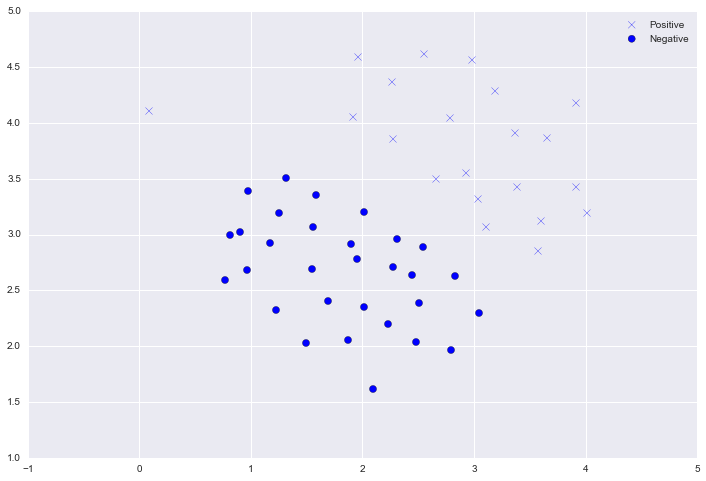

In [4]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

Notice there's one outlier positive example on the left. If we used linear regression, it would try to include that outlier, which would lopside the whole prediction. SVMs use a different approach for a decision boundary

We're not required to make one from scratch, so we'll use scikit-learn for a built-in one.

In [5]:
from sklearn import svm

svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [8]:
# for the first experiment, we'll use C=1 and see how it performs
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

It appears to have mis-classified the outlier, seeing as it wasn't directly 1 or 0. We'll tweak our C value to change that

In [19]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

Now we got a perfect classification of the training data. However, by increasing the C value, we've created a decision boundary that's no longer a natural fit for the data

We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane:

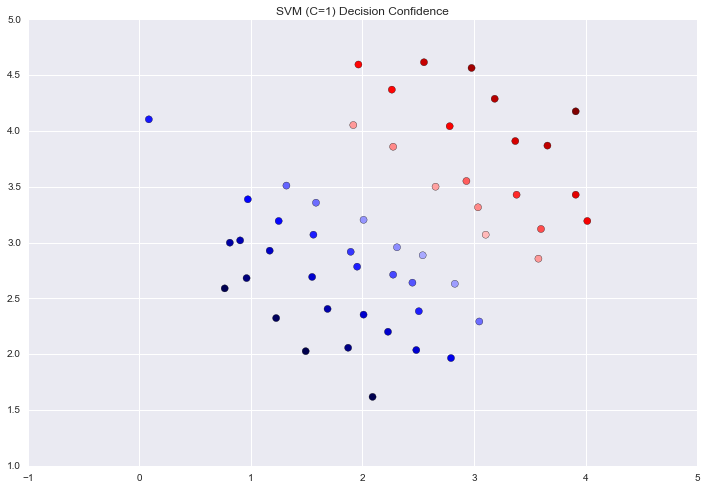

In [20]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

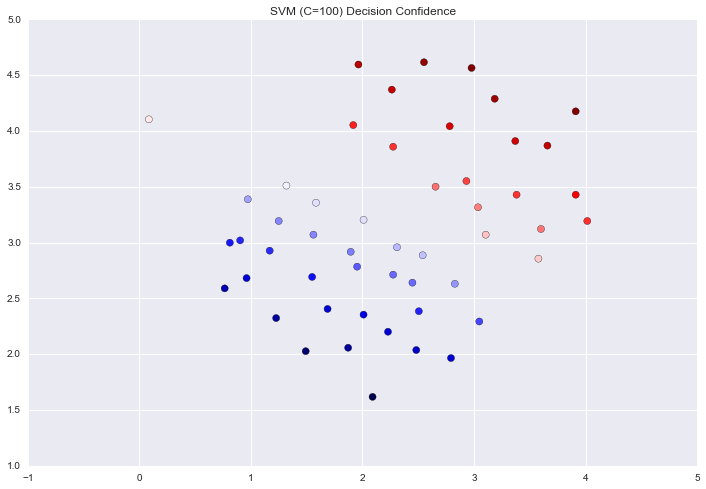

In [21]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

Looking at the colours of the data points in each plot, we can see that the first subplot has strong colours near the boundary (solid red/blue), which means it's a decent distance away from the boundary.

The closer to the boundary these dots are, the whiter they become, as you can see in the second picture

Now we'll move from a linear SVM to one that's capable of non-linear classification, by using kernels. We're first tasked with implementing a Gaussian kernel function. This is built into scikit-learn, but we'll implement one from scratch

In [23]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2
gaussian_kernel(x1, x2, sigma)

0.32465246735834974

That result matches the expected value from the assignment.

Next, we're going to examine another dataset, this time with a non-linear decision boundary.

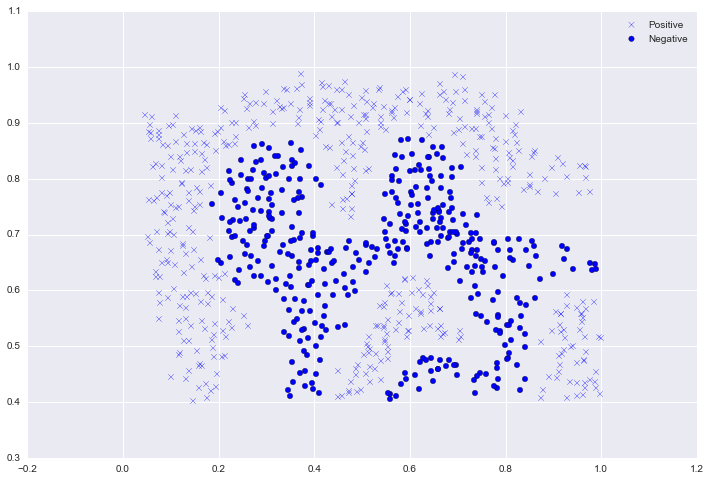

In [25]:
raw_data = loadmat(pwd + '/asn6/data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

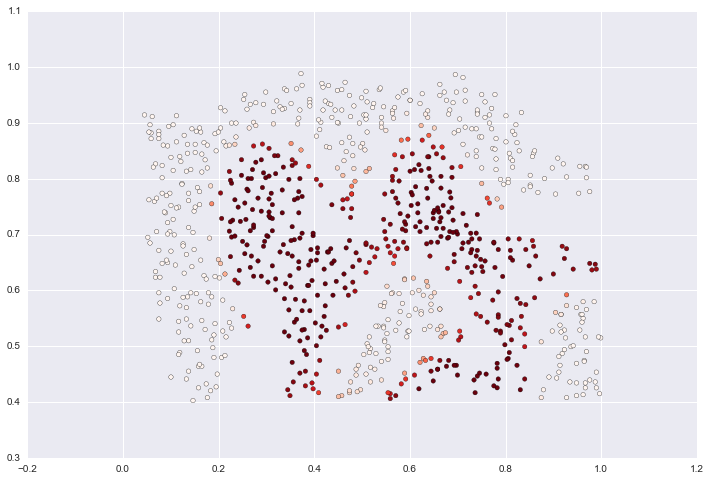

In [34]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc.fit(data[['X1', 'X2']], data['y'])
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:, 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=20, c=data['Probability'], cmap='Reds')

In [38]:
raw_data = loadmat(pwd + '/asn6/data/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].flatten()
yval = raw_data['yval'].flatten()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
            
best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

In [40]:
spam_train = loadmat(pwd + '/asn6/data/spamTrain.mat')
spam_test = loadmat(pwd + '/asn6/data/spamTest.mat')

spam_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [41]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].flatten()
ytest = spam_test['ytest'].flatten()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [42]:
svc = svm.SVC()
svc.fit(X, y)
print 'Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2))

Test accuracy = 95.3%
